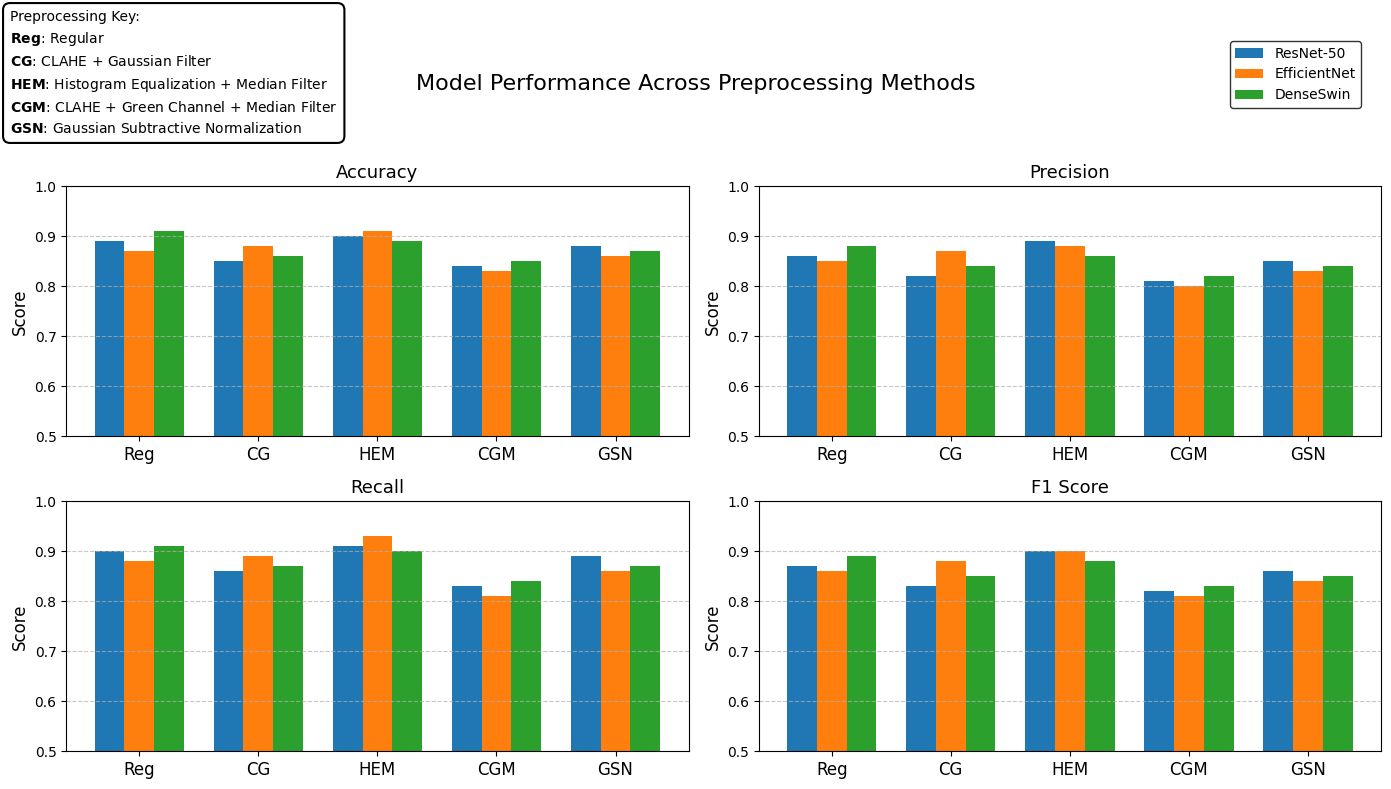

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
preprocessing_methods = ['Regular', 'CLAHE + Gaussian Filter', 'Histogram Equalization + Median Filter', 'CLAHE on Green Channel + Median Filter', 'Gaussian Subtractive Normalization']
short_labels = ['Reg', 'CG', 'HEM', 'CGM', 'GSN']
models = ['ResNet-50', 'EfficientNet', 'DenseSwin']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

scores = np.array([
    # Accuracy
    [
        [0.89, 0.87, 0.91],  # Method A
        [0.85, 0.88, 0.86],  # Method B
        [0.90, 0.91, 0.89],  # Method C
        [0.84, 0.83, 0.85],  # Method D
        [0.88, 0.86, 0.87]   # Method E
    ],
    # Precision
    [
        [0.86, 0.85, 0.88],
        [0.82, 0.87, 0.84],
        [0.89, 0.88, 0.86],
        [0.81, 0.80, 0.82],
        [0.85, 0.83, 0.84]
    ],
    # Recall
    [
        [0.90, 0.88, 0.91],
        [0.86, 0.89, 0.87],
        [0.91, 0.93, 0.90],
        [0.83, 0.81, 0.84],
        [0.89, 0.86, 0.87]
    ],
    # F1 Score
    [
        [0.87, 0.86, 0.89],
        [0.83, 0.88, 0.85],
        [0.90, 0.90, 0.88],
        [0.82, 0.81, 0.83],
        [0.86, 0.84, 0.85]
    ]
])

# Plotting
x = np.arange(len(short_labels))  # positions for groups
width = 0.25  # width of each bar

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # One color per model

for idx, ax in enumerate(axes):
    for model_idx, model_name in enumerate(models):
        offset = (model_idx - 1) * width
        ax.bar(x + offset, scores[idx, :, model_idx], width, label=model_name, color=colors[model_idx])

    ax.set_title(metrics[idx], fontsize=13)
    ax.set_xticks(x)
    ax.set_xticklabels(short_labels, fontsize=12)
    ax.set_ylim(0.5, 1.0)
    ax.set_ylabel('Score', fontsize=12)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Legend once for all subplots
legend = fig.legend(models, loc='upper right', fontsize='medium', bbox_to_anchor=(0.98, 0.95))
legend.get_frame().set_edgecolor('black')

# Add explanation for short labels below the plots
label_lines = [r"$\bf{" + short + r"}$: " + full for short, full in zip(short_labels, preprocessing_methods)]
label_text = "Preprocessing Key:\n" + "\n".join(label_lines)

# Draw the text box in the upper left
fig.text(0.01, 0.98, label_text, ha='left', va='top', fontsize=10, linespacing=1.5)

# Add a rectangle around the text manually using a patch
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor='black', facecolor='white', linewidth=1.5)

# Add an annotation box with dummy text and override it with our label
fig.text(0.01, 0.98, label_text, ha='left', va='top', fontsize=10,
         linespacing=1.5, bbox=bbox_props)

fig.suptitle('Model Performance Across Preprocessing Methods', fontsize=16, y=0.9)
plt.tight_layout(rect=[0, 0, 1, 0.85]) 
plt.show()
